In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
#torch.nn.functional (aliased as F) gives you stateless functions (e.g., relu, softmax, conv2d, dropout) that perform the same math as layers, but without maintaining parameters.

In [7]:
#now we define a dropout instanxe and make some dta
prob=.5

dropout=nn.Dropout(p=prob)
x=torch.ones(10)


y=dropout(x)
print(y)
print(torch.mean(y))

tensor([2., 2., 0., 2., 2., 2., 0., 2., 0., 0.])
tensor(1.2000)


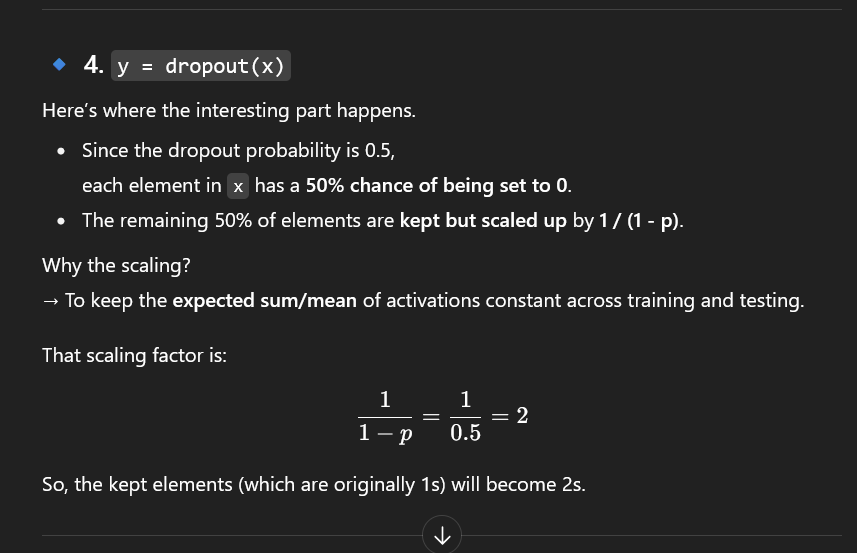

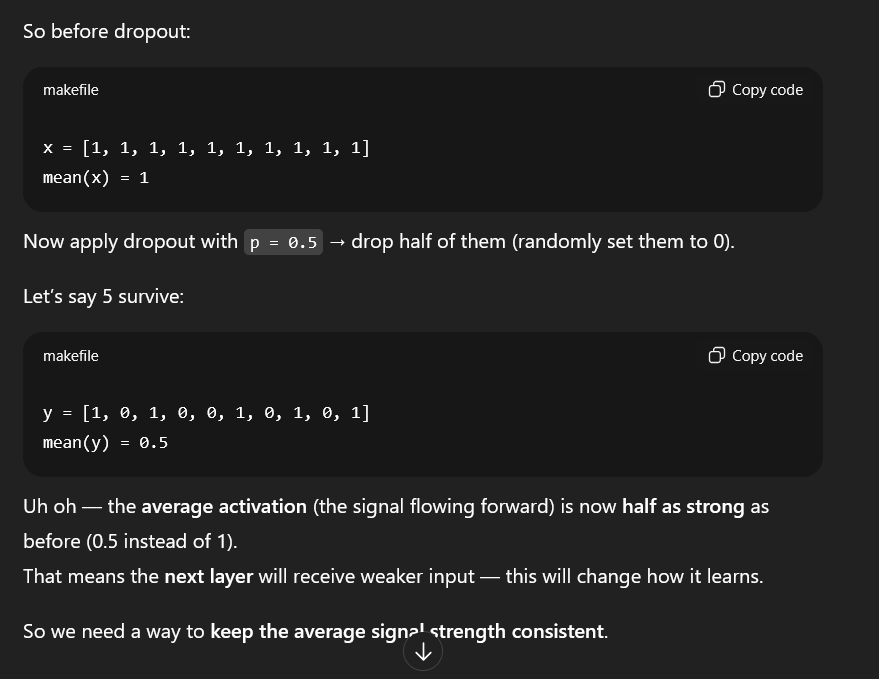

In [8]:
#dropout is turned off when evaluating the model
dropout.eval()

y=dropout(x)
print(y)
print(torch.mean(y))

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor(1.)


In [9]:
# even during eval mode F.dropout() still works
dropout.eval()
y=F.dropout(x)
print(y)
print(torch.mean(y))

tensor([2., 2., 2., 0., 0., 0., 0., 2., 2., 2.])
tensor(1.2000)


In [10]:
#we manually switch it off
y=F.dropout(x,training=False)
print(y)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


In [12]:
# model needs to be reset after toogling into the eval mode
dropout.train()
y=dropout(x)
print(y) #with dropout

dropout.eval()
y=dropout(x)
print(y) #with dropout

dropout.train()
y=dropout(x)
print(y)

tensor([2., 0., 0., 2., 0., 0., 2., 2., 0., 2.])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([2., 0., 2., 0., 0., 2., 2., 2., 0., 2.])
